In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input\application_test.csv.zip
../input\application_train.csv.zip
../input\bureau.csv.zip
../input\bureau_balance.csv.zip
../input\credit_card_balance.csv.zip
../input\HomeCredit_columns_description.csv
../input\installments_payments.csv.zip
../input\POS_CASH_balance.csv.zip
../input\previous_application.csv.zip
../input\sample_submission.csv


> # <font color='green'>**Importing Libraries**</font>


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

> # <font color='green'>**Loading dataset**</font>


In [3]:
home_des=pd.read_csv("../input/home-credit-default-risk/HomeCredit_columns_description.csv",encoding='Latin-1')
pd.DataFrame(home_des)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
pos_cash=pd.read_csv("../input/home-credit-default-risk/POS_CASH_balance.csv")
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [5]:
app_test=pd.read_csv("../input/home-credit-default-risk/application_test.csv")
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
app_train=pd.read_csv("../input/home-credit-default-risk/application_train.csv")
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
bur=pd.read_csv("../input/home-credit-default-risk/bureau.csv")
bur

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [8]:
bur_bal=pd.read_csv("../input/home-credit-default-risk/bureau_balance.csv")
bur_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [9]:
cc_bal=pd.read_csv("../input/home-credit-default-risk/credit_card_balance.csv")
cc_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [10]:
inst_pay=pd.read_csv("../input/home-credit-default-risk/installments_payments.csv")
inst_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [11]:
pre_app=pd.read_csv("../input/home-credit-default-risk/previous_application.csv")
pre_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [12]:
s_sub=pd.read_csv("../input/home-credit-default-risk/sample_submission.csv")
s_sub

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


> # <font color='green'>**Data preposcessing**</font>


In [17]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
app_train.shape

(307511, 122)

In [19]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [20]:
(app_train.isnull().sum()).sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [21]:
app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
OWN_CAR_AGE,104582.000000,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000


In [22]:
app_train.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="orange").bar(subset = ["count"], color ="pink")

,count,unique,top,freq
FONDKAPREMONT_MODE,97216,4,reg oper account,73830
HOUSETYPE_MODE,153214,3,block of flats,150503
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
WALLSMATERIAL_MODE,151170,7,Panel,66040
EMERGENCYSTATE_MODE,161756,2,No,159428
FLAG_OWN_CAR,307511,2,N,202924


> **Handling missing values**

In [23]:
for tr in app_train.describe(include='object').columns:
    app_train[tr]=app_train[tr].fillna((app_train[tr].mode()))

In [24]:
for ci in app_train.describe().columns:
    app_train[ci]=app_train[ci].fillna((app_train[ci].median()))

In [25]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [26]:
for te in app_test.describe(include='object').columns:
    app_test[te]=app_test[te].fillna((app_test[te].mode()))


In [27]:
for tt in app_test.describe().columns:
    app_test[tt]=app_test[tt].fillna((app_test[tt].median()))

In [28]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [29]:
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

> **Analysing train dataset**

In [30]:
for j in app_train.columns:
    print(j.capitalize())
    print('Number of Unique values:',app_train[j].nunique())
    print("Value Count of ",j.capitalize())
    print(app_train[j].value_counts())
    print("")
    print("**********************************************************************************")
    print("")

Sk_id_curr
Number of Unique values: 307511
Value Count of  Sk_id_curr
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**********************************************************************************

Target
Number of Unique values: 2
Value Count of  Target
0    282686
1     24825
Name: TARGET, dtype: int64

**********************************************************************************

Name_contract_type
Number of Unique values: 2
Value Count of  Name_contract_type
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

**********************************************************************************

Code_gender
Number of Unique values: 3
Value Count of  Code_gender
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**************************************************************************

In [31]:
type(app_train.columns)

pandas.core.indexes.base.Index

> # <font color='green'>**Data Visualization**</font>


In [32]:
l1=[]
l2=[]
for k in app_train.columns:
    if (app_train[k].nunique())<100:
        l1.append(k)
    else:
        l2.append(k)

Histograms of dataset


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe4dc9fa5f0> (for post_execute):


KeyboardInterrupt: 

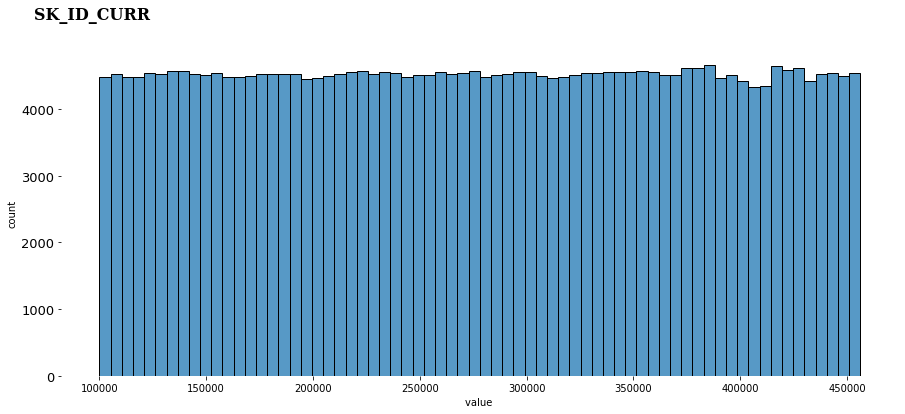

Error in callback <function flush_figures at 0x7fe4dcfb4830> (for post_execute):


KeyboardInterrupt: 

In [33]:
print("Histograms of dataset")
for h in l2:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.histplot(app_train[h], palette='Blues_r')
  fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value ', fontsize=10)
  plt.ylabel('count',fontsize=10)
  plt.yticks(fontsize=13)
  plt.box(False)


In [ ]:
for i in l1:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = app_train[i][1:],data=app_train.iloc[1:], order=app_train[i][1:].value_counts().index, palette='Blues_r')
  fig.text(0.1, 0.95, f'{i}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value counts ', fontsize=20)
  plt.ylabel(f'{i}')
  plt.yticks(fontsize=13)
  plt.box(False)

> # <font color='green'>**Modeling**</font>


In [34]:
l = LabelEncoder()
for q in app_test.describe(include='object').columns:
    app_test[q]=l.fit_transform(app_test[q])
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [35]:

l = LabelEncoder()
for p in app_train.describe(include='object').columns:
    app_train[p]=l.fit_transform(app_train[p])
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:

x=app_train.drop(['TARGET','SK_ID_CURR'],axis=1)

print(x)
y=app_train['TARGET']
print(y)

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    40

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=.30,random_state=1)


In [38]:
x_test=app_test.drop(['SK_ID_CURR'],axis=1)

>  <font color='blue'>**Linear Regression model**</font>


In [39]:
lr = LogisticRegression(max_iter=3000, n_jobs=-1)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)


lr_acc = accuracy_score(y_pred_lr,y_valid)

pred_lr=lr.predict(x_test)
print(pred_lr)
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)


[0 0 0 ... 0 0 0]
LogisticRegressionModel Train Score is :  0.9193522161880915
LogisticRegressionModel Test Score is :  0.9190495805059943
LogisticRegressionModel accuracy is :  0.9190495805059943


>  <font color='blue'>**Decision tree model**</font>


In [40]:
dt= DecisionTreeClassifier(n_jobs=-1)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_valid, y_valid)


dt_acc = accuracy_score(y_pred_dt,y_valid)


pred_dt=dt.predict(x_test)
print(pred_dt)


print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print('DecisionTreeClassifier accuracy is : ', dt_acc)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

>  <font color='blue'>**Random Forest model**</font>


In [ ]:
rf= RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_valid, y_valid)


rf_acc = accuracy_score(y_pred_rf,y_valid)


pred_rf=rf.predict(x_test)
print(pred_rf)


print('RandomForestClassifier Train Score is : ' , rf_train_score)
print('RandomForestClassifier Test Score is : ' , rf_test_score)
print('RandomForestClassifier accuracy is : ', rf_acc)

> # <font color='green'>**Output**</font>


In [ ]:
models = ['LogisticRegression'  , 'DecisionTree','RandomForest']
model_data = [lr_acc  , dt_acc, rf_acc ]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

In [ ]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(
    template="plotly_dark")

Random forest shows maximum accuracy than other models

In [ ]:
Submission = pd.DataFrame({ 'SK_ID_CURR': app_test['SK_ID_CURR'],
                            'TARGET': pred_lr })
Submission.to_csv("Submission.csv", index=False)

In [ ]:
Submission